In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import cv2
import sys
import math
import time
import random
import os
from datetime import datetime
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from sewar.full_ref import vifp

In [5]:
from iEBMO import bmoIE

In [6]:
pSize = [30]
maxIter = 100
imageNameList = ['./data/DIPCO2017_dataset/1.bmp']
# imageNameList = ['a0027.tiff', 'a0037.tiff', 'a0050.tiff']
# imageNameList = ['a0027.png', 'a0037.png', 'a0050.png']

# print(imageNameList)

# imageNameList = ['./data/kodim/kodim01.png', './data/kodim/kodim02.png', './data/kodim/kodim03.png', './data/kodim/kodim04.png',
#                  './data/kodim/kodim05.png', './data/kodim/kodim06.png', './data/kodim/kodim07.png', './data/kodim/kodim08.png', './data/kodim/kodim09.png']


In [9]:
# converte imagens bmp para png
from PIL import Image

for imgName in imageNameList:
    im = Image.open(imgName)
    im.save(imgName.replace('.bmp', '.png'))
    imageNameList[imageNameList.index(imgName)] = imgName.replace('.bmp', '.png')
    
imageNameList    

['./data/DIPCO2017_dataset/1.png']

./data/DIPCO2017_dataset/1.png
30
2.306225603159158e+18
2.306225603159158e+18
4.5735038514048323e+18
4.5735038514048323e+18
1.5082379950986947e+17
1.5082379950986947e+17
4.181503655989907e+19
4.181503655989907e+19
4.175824950885034e+20
4.175824950885034e+20
4.590716323164576e+19
4.590716323164576e+19
1.2241858527648335e+18
1.2241858527648335e+18
8.410512129923452e+19
8.410512129923452e+19
4.321451921766168e+18
4.321451921766168e+18
1.5734884969016594e+18
1.5734884969016594e+18
1.5910968213524352e+20
1.5910968213524352e+20
1.8810462222919475e+19
1.8810462222919475e+19
7.262111449561373e+18
7.262111449561373e+18
1.5425195227977654e+19
1.5425195227977654e+19
5.626021676431844e+18
5.626021676431844e+18
1.4660902062510086e+19
1.4660902062510086e+19
2.1920143296541737e+19
2.1920143296541737e+19
1.2209827027818534e+18
1.2209827027818534e+18
4.0633063508250547e+18
4.0633063508250547e+18
7.354301505571807e+18
7.354301505571807e+18
2.187617219633944e+19
2.187617219633944e+19
2.0002566641207452e+

FileNotFoundError: [Errno 2] No such file or directory: './histogramsDIBCO/ho_./data/DIPCO2017_dataset/1.png'

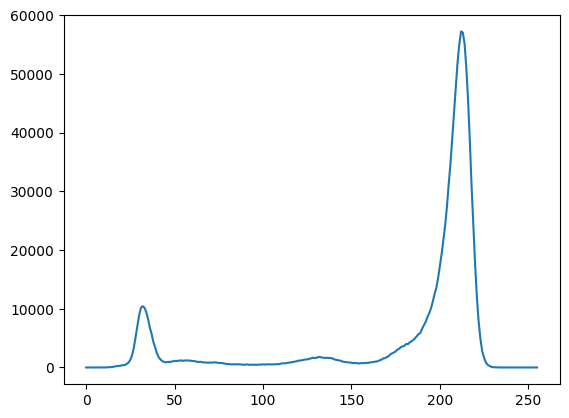

In [20]:
for i in range(len(imageNameList)):
    averagePsnr = 0
    averageSsim = 0
    averageVif = 0
    print(imageNameList[i])
    for popSize in pSize:
        print(popSize)

        inputName = "GroundTruth/kodakDataset/"+imageNameList[i]
        truthName = imageNameList[i]

        trImg = cv2.imread(truthName, 0)
        cv2.imshow('input', trImg)
        histr = cv2.calcHist([trImg], [0], None, [256], [0, 256])
        plt.plot(histr)
        # histogram of ground truth
        name_image_list = imageNameList[i].split('/')
        plt.savefig(f"./histogramsDIBCO/ht_{name_image_list[-1]}")
        plt.clf()
        cv2.imwrite(f"./truthDIBCO/t_{name_image_list[-1]}", trImg)

        bestImage = deepcopy(trImg)

        maxPsnr = 0
        maxSsim = 0
        maxVif = 0
        maxfit = -1000
        for iteration in range(10):
            outputImage, fitval = bmoIE(truthName, popSize, maxIter)

            truthImage = cv2.imread(truthName, 0)
            psnrval = cv2.PSNR(outputImage, truthImage)
            ssimval = ssim(outputImage, truthImage)
            vifval = vifp(outputImage, truthImage)
            print(iteration,psnrval,ssimval,vifval,int((psnrval+ssimval+vifval)*100))
            print(psnrval, ssimval, vifval)
            continue

            if (psnrval+ssimval+vifval) > maxfit:
                maxfit = psnrval+ssimval+vifval
                maxPsnr = psnrval
                maxSsim = ssimval
                maxVif = vifval
                bestImage = deepcopy(outputImage)
            cv2.imshow(str(iteration+1),bestImage)

        print(maxPsnr, maxSsim, maxVif)

        averagePsnr += maxPsnr
        averageSsim += maxSsim
        averageVif += maxVif
        print(i+1,averagePsnr,averageSsim,averageVif)

        histr = cv2.calcHist([bestImage],[0],None,[256],[0,256])
        plt.plot(histr)
        plt.savefig(f"./histogramsDIBCO/ho_{name_image_list[-1]}") #histogram of output image
        plt.clf()
        transImageName = "o_"+name_image_list[-1]
        cv2.imwrite(f"./outputDIBCO/{transImageName}", bestImage)


    averagePsnr /= len(imageNameList)
    averageSsim /= len(imageNameList)
    averageVif /= len(imageNameList)
    print("final")
    print(averagePsnr)
    print(averageSsim)
    print(averageVif)